## **Data exploration of blood creatinine level**
* for dialysis patients vs non-dialysis patients


In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

In [24]:
raw = pd.read_csv('Downloads/results-20190720-225403.csv')

In [25]:
dial = raw[['patientunitstayid','dialysis']]

In [110]:
cre = pd.read_csv('Downloads/creatanine.csv')
cre = cre.loc[cre['chartoffset'].between(-1440,28800)]
cre = cre.loc[cre['creatinine'].between(0,24)]

In [111]:
merged = cre.merge(dial, on='patientunitstayid', how="inner")

In [114]:
merged.head()

,patientunitstayid,chartoffset,creatinine,dialysis
0,141266,-703,1.9,0
1,141266,2214,1.5,0
2,141266,5147,1.2,0
3,141266,6557,1.2,0
4,141266,8020,1.2,0


In [132]:
merged['binned']= pd.cut(merged['chartoffset'], bins=21)

In [138]:
merged['time'] = [(x.left + x.right)/2 for x in merged['binned'].values]

In [179]:
creat_mean = merged[['creatinine','time','dialysis']].groupby(['time','dialysis']).mean().unstack()
creat_25 = merged[['creatinine','time','dialysis']].groupby(['time','dialysis']).quantile(0.25).unstack()
creat_75 = merged[['creatinine','time','dialysis']].groupby(['time','dialysis']).quantile(0.75).unstack()

In [180]:
creat_mean.columns = ['nodial','dial']
creat_25.columns = ['nodial25','dial25']
creat_75.columns = ['nodial75','dial75']

In [187]:
creat_all = pd.concat([creat_agg.reset_index(), creat_25.reset_index(), creat_75.reset_index()], sort=False)
creat_all = creat_all.apply(lambda x: pd.Series(x.dropna().values))[:21]

In [189]:
creat_all.head(2)

,time,nodial,dial,nodial25,dial25,nodial75,dial75
0,-735.12,2.664038,2.957712,1.46,1.275,3.1,3.800
1,720.00,2.508733,3.199333,1.35,1.630,3.0,3.965


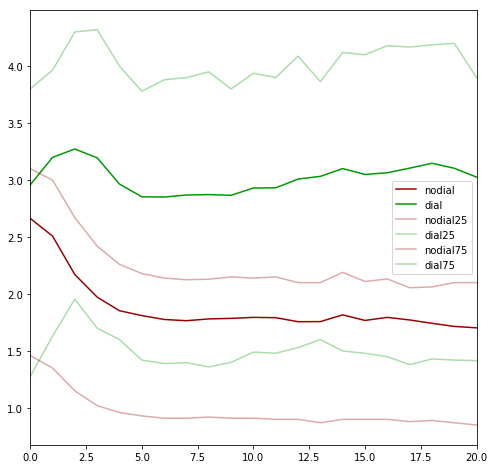

In [220]:
creat_all[creat_all.columns[1:]].plot(color=['#990000ff','#009900ff','#99000055','#00990055','#99000055','#00990055'], figsize=(8,8))
# creat_agg.plot.scatter(x='time', y='creatinine', c='dialysis', cmap='Spectral', figsize=(20,10),s=1, alpha=0.5)

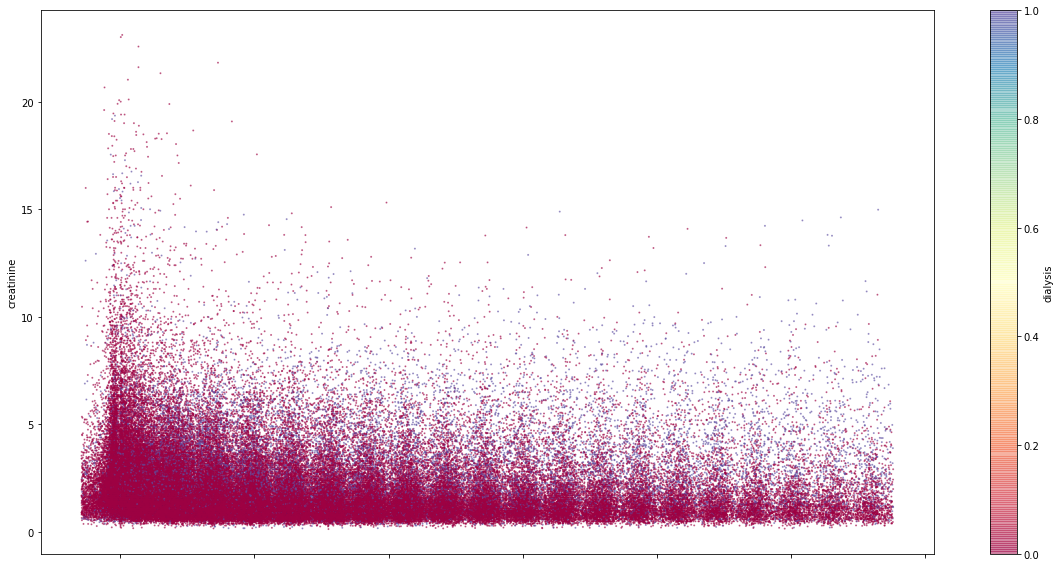

In [152]:
merged.plot.scatter(x='chartoffset', y='creatinine', c='dialysis', cmap='Spectral', figsize=(20,10),s=1, alpha=0.5)

In [233]:
creat.loc[(creat['dial'] > 2) | (creat['nodial'] > 2)]

array([37669, 13074])

In [269]:
perc_dial = []
upper = []
i = 0
while i < 5:
    val = creat.loc[(creat['dial'] > i) | (creat['nodial'] > i)].notnull().sum().values
    perc_dial.append(val[1]/(val[0] + val[1])*100)
    upper.append(i)
    i += 0.1
    
upperthres = pd.concat([pd.Series(upper),pd.Series(perc_dial)], axis=1)

In [270]:
upperthres.columns = ['upper', '% dial']

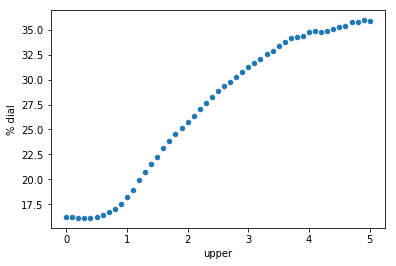

In [271]:
upperthres.plot.scatter(y='% dial',x='upper')

In [74]:
creat = pd.DataFrame([merged['creatinine'].loc[merged['dialysis'] == 0],merged['creatinine'].loc[merged['dialysis'] == 1]]).T
creat.columns = ('dial', 'nodial')

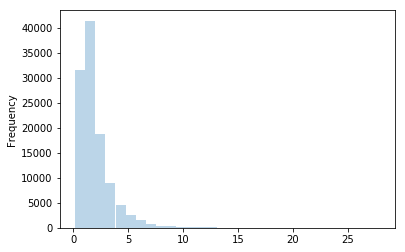

In [90]:
creat['dial'].plot.hist(alpha=0.3, bins=30)

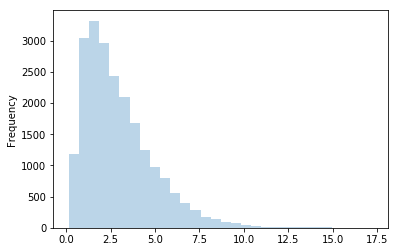

In [89]:
creat['nodial'].plot.hist(alpha=0.3, bins=30)